# Cards Exploratory Data Analysis

In this notebook, we explore the Augmented CARDS dataset and sample a small benchmark of 600 claims, each with a corresponding label (0-5).

In [1]:
import string

import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "notebook_connected+png"

## Load the Augmented CARDS dataset

In [2]:
# Download the augmented_cards.csv file from https://figshare.com/articles/dataset/Untitled_Item/25465036
df = pd.read_csv("../../data/benchmark/augmented_cards.csv")
df

,text,binary_claim,cards_claim,acards_claim,full_claim,DATASET,PARTITION
0,! !! # climate change feelings https://t.co/X8...,0,NaN,NaN,NaN,waterloo,VALID
1,!! climate change should not be a partisan iss...,0,NaN,NaN,NaN,waterloo,TRAIN
2,""" ""Current scientific understanding provides l...",0,0_0,0_0,NaN,cards,TRAIN
3,""" ""International accords and underlying region...",0,0_0,0_0,NaN,cards,VALID
4,""" ...all models contain large errors in precip...",1,5_1,5_1,NaN,cards,TRAIN
...,...,...,...,...,...,...,...
75648,💪Be the change.✅Shape the future.📣Submit your ...,0,0_0,0_0,0_0,golden,TEST
75649,📝 Tackling the climate crisis is daunting. Thi...,0,0_0,0_0,0_0,golden,TEST
75650,📺Our Technological Innovations and Climate Cha...,0,0_0,0_0,0_0,golden,TEST
75651,🚨 SHOCKING: Top Conservative donor Lord Frost ...,0,0_0,0_0,0_0,golden,TEST


In [3]:
# There are 3 dataset sources
df["DATASET"].value_counts()

DATASET
waterloo    43943
cards       28999
golden       2711
Name: count, dtype: int64

`waterloo`

Quote from [Hierarchical CARDS](https://www.nature.com/articles/s43247-024-01573-7.pdf):
> To enhance the model’s performance, we incorporated the Climate Change Twitter Dataset labelled by the University of Waterloo, featuring a 90/10 ratio of verified and misleading tweets (https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset), to the binary classifier training set.

_This issue is that the labels for this dataset are binary only._

`cards`

Quotes from [CARDS](https://osf.io/preprints/socarxiv/crxfm):

> We wrote custom software to harvest all content from 20 conservative think tanks and 33 climate contrarian blogs and the 255 climate-related content of 20 conservative think-tanks over period from 1998 to 2020. Extended Data Tables 1-2 provide a full list of the blogs and CTTs included in this study, as well as the number of documents provided by each source. We collected a total of 249,413 climate change relevant documents—which contain over 174 million words (tokens)—from these 53 sources over the relevant time period. Extended Data Figs. 1-2 illustrate the total document frequencies over time, offering the monthly counts of documents for blogs and CTTs.

>  In order to provide an accurate assessment of model performance in light of noisy label information and to facilitate comparison across deep and shallow classifiers, we split our annotated paragraphs into a training set (n = 23,436), validation set (n = 2,605), and an "error free" test set (n = 2,904). To arrive at the "error free" test set, we 1) generated a random sample of annotated paragraphs which matched the class distribution in the training set and 2) re-annotated the test set to fix clear annotation errors.

_It's unclear about what "error free" means for the training and validation sets. Does it imply that they might contain labeling errors?_

`golden`

Quote from [Hierarchical CARDS](https://www.nature.com/articles/s43247-024-01573-7.pdf):
> To assess the model’s capabilities, climate change experts labelled a
testing set of tweets following the CARDS taxonomy. This dataset, denoted as Expert
Annotated Climate Tweets in Table 1, was composed of ~~2607~~ 2711 tweets related to
climate change, sampled from the platform in the second half of 2022.



In [4]:
# Remove duplicates
canonical_text = (
    df["text"].str.lower().str.replace(f"[{string.punctuation}]", "", regex=True)
)
df = df.loc[canonical_text.drop_duplicates().index]
df

,text,binary_claim,cards_claim,acards_claim,full_claim,DATASET,PARTITION
0,! !! # climate change feelings https://t.co/X8...,0,NaN,NaN,NaN,waterloo,VALID
1,!! climate change should not be a partisan iss...,0,NaN,NaN,NaN,waterloo,TRAIN
2,""" ""Current scientific understanding provides l...",0,0_0,0_0,NaN,cards,TRAIN
3,""" ""International accords and underlying region...",0,0_0,0_0,NaN,cards,VALID
4,""" ...all models contain large errors in precip...",1,5_1,5_1,NaN,cards,TRAIN
...,...,...,...,...,...,...,...
75648,💪Be the change.✅Shape the future.📣Submit your ...,0,0_0,0_0,0_0,golden,TEST
75649,📝 Tackling the climate crisis is daunting. Thi...,0,0_0,0_0,0_0,golden,TEST
75650,📺Our Technological Innovations and Climate Cha...,0,0_0,0_0,0_0,golden,TEST
75651,🚨 SHOCKING: Top Conservative donor Lord Frost ...,0,0_0,0_0,0_0,golden,TEST


In [5]:
# Remove texts that only have a binary label (bye waterloo)
display(df["cards_claim"].isna().value_counts())
df = df.dropna(subset="cards_claim")
df

cards_claim
True     41082
False    31509
Name: count, dtype: int64

,text,binary_claim,cards_claim,acards_claim,full_claim,DATASET,PARTITION
2,""" ""Current scientific understanding provides l...",0,0_0,0_0,NaN,cards,TRAIN
3,""" ""International accords and underlying region...",0,0_0,0_0,NaN,cards,VALID
4,""" ...all models contain large errors in precip...",1,5_1,5_1,NaN,cards,TRAIN
5,""" ...analyzed storminess across the whole of s...",1,1_7,1_7,NaN,cards,TRAIN
6,""" A paper published ...in the Journal of Geoph...",1,2_1,2_1,NaN,cards,TRAIN
...,...,...,...,...,...,...,...
75648,💪Be the change.✅Shape the future.📣Submit your ...,0,0_0,0_0,0_0,golden,TEST
75649,📝 Tackling the climate crisis is daunting. Thi...,0,0_0,0_0,0_0,golden,TEST
75650,📺Our Technological Innovations and Climate Cha...,0,0_0,0_0,0_0,golden,TEST
75651,🚨 SHOCKING: Top Conservative donor Lord Frost ...,0,0_0,0_0,0_0,golden,TEST


In [6]:
# Remove the single remaining waterloo text
display(df["DATASET"].value_counts())
df = df[df["DATASET"] != "waterloo"]
df = df.copy()

DATASET
cards       28868
golden       2640
waterloo        1
Name: count, dtype: int64

In [7]:
# Rename "golden" to "twitter" for clarity
df["DATASET"] = df["DATASET"].replace("golden", "twitter")
df["DATASET"].value_counts()

DATASET
cards      28868
twitter     2640
Name: count, dtype: int64

## Explore the distribution of claims

In [8]:
# Add a column for CARDS claim level 1 & 2
df = df.rename(columns={"cards_claim": "cards_claim_2"})
df["cards_claim_1"] = df["cards_claim_2"].str.split("_").str[0]
df

,text,binary_claim,cards_claim_2,acards_claim,full_claim,DATASET,PARTITION,cards_claim_1
2,""" ""Current scientific understanding provides l...",0,0_0,0_0,NaN,cards,TRAIN,0
3,""" ""International accords and underlying region...",0,0_0,0_0,NaN,cards,VALID,0
4,""" ...all models contain large errors in precip...",1,5_1,5_1,NaN,cards,TRAIN,5
5,""" ...analyzed storminess across the whole of s...",1,1_7,1_7,NaN,cards,TRAIN,1
6,""" A paper published ...in the Journal of Geoph...",1,2_1,2_1,NaN,cards,TRAIN,2
...,...,...,...,...,...,...,...,...
75648,💪Be the change.✅Shape the future.📣Submit your ...,0,0_0,0_0,0_0,twitter,TEST,0
75649,📝 Tackling the climate crisis is daunting. Thi...,0,0_0,0_0,0_0,twitter,TEST,0
75650,📺Our Technological Innovations and Climate Cha...,0,0_0,0_0,0_0,twitter,TEST,0
75651,🚨 SHOCKING: Top Conservative donor Lord Frost ...,0,0_0,0_0,0_0,twitter,TEST,0


![](./cards_taxonomy.png)

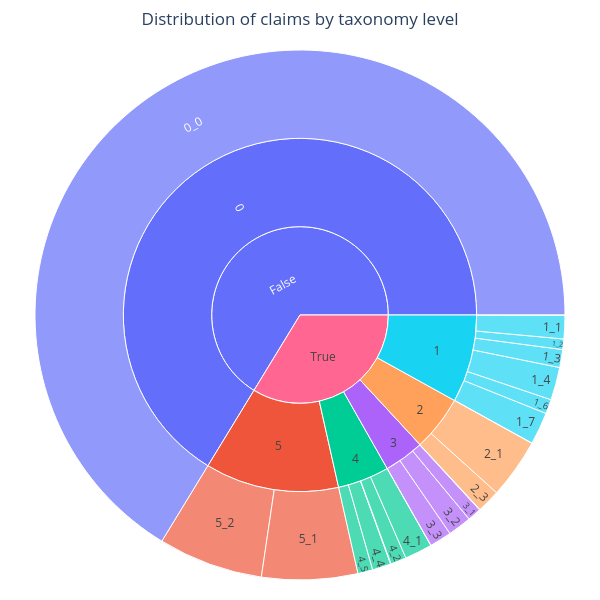

In [9]:
df["is_contrarian_claim"] = df["cards_claim_1"] != "0"
px.sunburst(
    df.sort_values("cards_claim_2"),
    path=["is_contrarian_claim", "cards_claim_1", "cards_claim_2"],
    color="cards_claim_1",
    title="Distribution of claims by taxonomy level",
    width=600,
    height=600,
).update_traces(sort=False, hovertemplate="%{id}: <b>%{value:,d}</b>").update_layout(
    dict(margin=dict(l=20, r=20, t=50, b=20), title_x=0.5)
)

In [10]:
df["cards_claim_2"].value_counts().sort_values()

cards_claim_2
3_6        1
3_4        1
1_8        5
1_0        6
4_3        9
3_0       12
1_2      202
3_1      263
1_6      277
4_5      287
4_2      302
1_3      344
4_4      357
3_3      424
2_3      447
1_1      449
3_2      453
4_1      530
1_7      620
1_4      631
2_1     1151
5_1     1841
5_2     2014
0_0    20882
Name: count, dtype: int64

I propose we begin with the CARDS Level 1 taxonomy for the following reasons:

- Starting with a simpler taxonomy of 5 + 1 classes, rather than 27 + 1, will streamline our initial work.
- While the CARDS Level 2 examples provide some depth, they may not be fully exhaustive.
- Several CARDS Level 2 claims have very limited labeled examples. For instance, claim `3_6` has only one example available.
- Even the authors noted potential confusion among certain sublabels, as illustrated below:
  > Due to thematic overlap between sub-claims 5.2 (Movement is unreliable) and 5.3 (Climate is a conspiracy), we collapsed these claims into a single measure.

## Limitation of the CARDS Dataset

The CARDS dataset provides claims extracted directly from articles.
However, the full context of these articles is not available 😢.
Additionally, some claims originate from short tweets.

The median length of claims is approximately 40 words.
It is about ten times shorter than the 2-minute excerpts from Mediatree...

In [11]:
# Median length per dataset
df["text"].str.split().str.len().groupby(df["DATASET"]).median()

DATASET
cards      43.0
twitter    32.0
Name: text, dtype: float64

Another issue, in my opinion, is that some labels could be open to debate.
For example, without context, I’m not sure I would have classified the following tweet as `science_is_unreliable`:

```json
{
    "claim":"@SallyMayweather @soUNTOUCHABLE2 Seems a bit suspicious to me. They'll blame climate change, of course",
    "label":"5_science_is_unreliable",
    "source":"twitter"
}
```

## Create a temporary benchmark

To get started, until we have our own Mediatree benchmark.

In [12]:
benchmark = df

In [13]:
# Claims from the class `0` (no contrarian claim) often have nothing to do with climate, such as:
# > If you drive regularly along Route 100 in Howard County, you might notice the lighting is a little dimmer than it used to be
# To avoid making the classification too easy, we only sample examples that contain some climate-related keywords

# I asked ChatGPT to generate these
climate_keywords = [
    "climate",
    "global warming",
    "greenhouse",
    "carbon",
    "sustainability",
    "ecosystem",
    "biodiversity",
    "renewable energy",
    "adaptation and mitigation",
]
# Remove claims that are too easy to classify
mask_to_drop = (benchmark["cards_claim_1"] == "0") & ~benchmark[
    "text"
].str.lower().str.contains("|".join(climate_keywords), regex=True)
benchmark = benchmark.drop(mask_to_drop[mask_to_drop].index)
benchmark

,text,binary_claim,cards_claim_2,acards_claim,full_claim,DATASET,PARTITION,cards_claim_1,is_contrarian_claim
3,""" ""International accords and underlying region...",0,0_0,0_0,NaN,cards,VALID,0,False
4,""" ...all models contain large errors in precip...",1,5_1,5_1,NaN,cards,TRAIN,5,True
5,""" ...analyzed storminess across the whole of s...",1,1_7,1_7,NaN,cards,TRAIN,1,True
6,""" A paper published ...in the Journal of Geoph...",1,2_1,2_1,NaN,cards,TRAIN,2,True
7,""" Eme et al. conclude , in their words, that ""...",1,3_2,3_2,NaN,cards,TRAIN,3,True
...,...,...,...,...,...,...,...,...,...
75648,💪Be the change.✅Shape the future.📣Submit your ...,0,0_0,0_0,0_0,twitter,TEST,0,False
75649,📝 Tackling the climate crisis is daunting. Thi...,0,0_0,0_0,0_0,twitter,TEST,0,False
75650,📺Our Technological Innovations and Climate Cha...,0,0_0,0_0,0_0,twitter,TEST,0,False
75651,🚨 SHOCKING: Top Conservative donor Lord Frost ...,0,0_0,0_0,0_0,twitter,TEST,0,False


In [14]:
# Since the authors mention that the test set from CARDS is the only one to be noise-free, we'll sample only from the test set
# The twitter split should be noise-free too
benchmark = benchmark[
    (benchmark["DATASET"] == "twitter")
    | ((benchmark["DATASET"] == "cards") & (benchmark["PARTITION"] == "TEST"))
]

# Random sampling should approximately preserve the original distribution
benchmark = benchmark.groupby("cards_claim_1").sample(
    100, replace=False, random_state=42
)

# We end up with rougly 50/50 cards/twitter sources
benchmark["DATASET"].value_counts()

DATASET
twitter    348
cards      252
Name: count, dtype: int64

In [15]:
# Rename and select relevant columns
benchmark = benchmark.rename(
    columns={"text": "claim", "cards_claim_1": "label", "DATASET": "source"}
)[["claim", "label", "source"]].reset_index(drop=True)
benchmark = benchmark.sort_values(["label", "source", "claim"])

# Add words to labels for clarity
# https://www.nature.com/articles/s41598-021-01714-4
# > five major categories: (1) it’s not happening, (2) it’s not us, (2) it’s not bad, (4) solutions won’t work, and (5) climate science/scientists are unreliable
benchmark["label"] = benchmark["label"].replace({
    "0": "0_accepted",
    "1": "1_its_not_happening",
    "2": "2_its_not_us",
    "3": "3_its_not_bad",
    "4": "4_solutions_wont_work",
    "5": "5_science_is_unreliable",
})
benchmark

,claim,label,source
57,"""We are hostage to a planetary scandal over cl...",0_accepted,cards
61,"(WASHINGTON, DC, OCTOBER 27,1998) --General Mo...",0_accepted,cards
35,"11 H. H. Lamb, Climate, History and the Modern...",0_accepted,cards
50,All of the forecasts made by a legion of clima...,0_accepted,cards
76,But what if this dynasty is built on a foundat...,0_accepted,cards
...,...,...,...
592,We had these temperatures 20 years ago - if th...,5_science_is_unreliable,twitter
581,When will the Climate Change Idiots finally un...,5_science_is_unreliable,twitter
580,Why do climate hysterics worry about global wa...,5_science_is_unreliable,twitter
559,Yet another excuse to deny women pain relief: ...,5_science_is_unreliable,twitter


In [16]:
# Show one example by class
print(benchmark.groupby("label").sample(1, random_state=7).to_json(orient="records", indent=2))

[
  {
    "claim":"@FrankLuntz @EWErickson In just the last 6 years, Republicans have pledged: \u25b6\ufe0f Roe would never be overturned \u25b6\ufe0f Covid would be a nothingburger \u25b6\ufe0f Trump wouldn\u2019t be that bad \u25b6\ufe0f climate change isn\u2019t a big dealNever trust Republicans when they\u2019re telling you you\u2019re being hysterical and alarmist",
    "label":"0_accepted",
    "source":"twitter"
  },
  {
    "claim":"The current drought was very unusual in the speed of its onset, with PDSI (Palmer Drought Severity Index) dropping from slightly wet to severe drought in just five months. In the Illinois Division 1 instrumental record, this has occurred only once before, in 1936. But the droughts current severity has been matched or exceeded on numerous occasions in the past, according to both the instrumental and tree-ring records. ?",
    "label":"1_its_not_happening",
    "source":"cards"
  },
  {
    "claim":"Ever notice temperature maps show red when the tempe

In [17]:
benchmark.to_csv("../../data/benchmark/cards_sample_600.csv", index=False)